In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

from acquire import get_mall_customer_data, get_iris_data

## 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.
    Choose features other than the ones used in the lesson.
    Visualize the results of your clustering.
    Use the elbow method to visually select a good value for k.
    Repeat the clustering, this time with 3 different features.

In [73]:
df = get_iris_data()

In [74]:
df = df.drop(columns=['measurement_id'])

In [75]:
df.head()

,species_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,1,4.7,3.2,1.3,0.2,setosa
3,1,4.6,3.1,1.5,0.2,setosa
4,1,5.0,3.6,1.4,0.2,setosa


In [76]:
train_validate, test = train_test_split(df, test_size=.2)
train, validate = train_test_split(train_validate, test_size=.25)

In [77]:
X_train = train.drop(columns=['species_id', 'species_name'])
y_train = train[['species_id', 'species_name']]

In [78]:
columns = ['petal_width', 'sepal_width']
X_train['petal_area'] = X_train.petal_length * X_train.petal_width
X_train['sepal_area'] = X_train.sepal_length * X_train.sepal_width

In [79]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train[columns])

KMeans(n_clusters=4)

In [80]:
kmeans.inertia_

8.894869234707945

In [81]:
X_train['clusters'] = kmeans.labels_

In [82]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=columns)

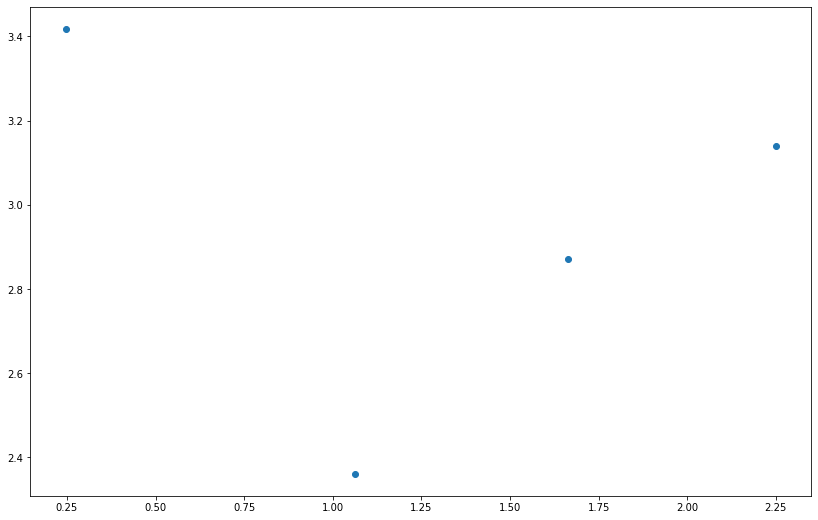

In [83]:
plt.figure(figsize=(14, 9))
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1]);

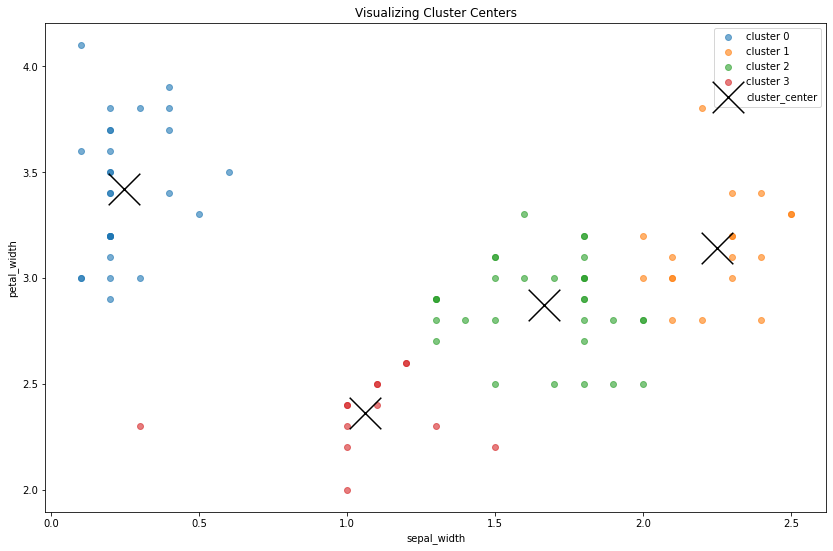

In [84]:
plt.figure(figsize=(14, 9))

for cluster, subset in X_train.groupby('clusters'):
    plt.scatter(subset.petal_width, subset.sepal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(
    x='petal_width',
    y='sepal_width',
    c='black',
    marker='x',
    s=1000,
    ax=plt.gca(),
    label='cluster_center'
)

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Cluster Centers');

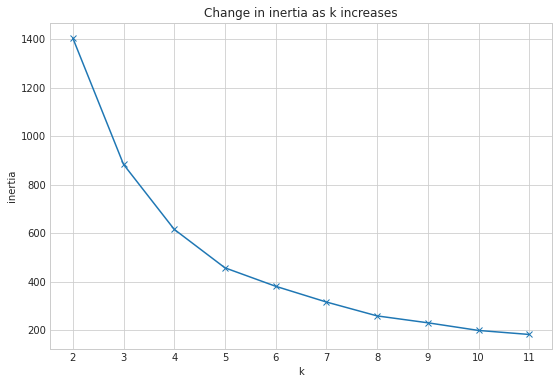

In [85]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_train).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [86]:
X_train[['clusters', 'petal_area', 'sepal_area']]

,clusters,petal_area,sepal_area
69,3,4.29,14.00
39,0,0.30,17.34
146,2,9.50,15.75
125,2,10.80,23.04
98,3,3.30,12.75
...,...,...,...
3,0,0.30,14.26
108,2,10.44,16.75
57,3,3.30,11.76
96,2,5.46,16.53


In [87]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train[columns])

KMeans(n_clusters=2)

In [88]:
kmeans.cluster_centers_

array([[1.73114754, 2.85081967],
       [0.24827586, 3.37931034]])

In [89]:
X_train['clusters2'] = kmeans.labels_

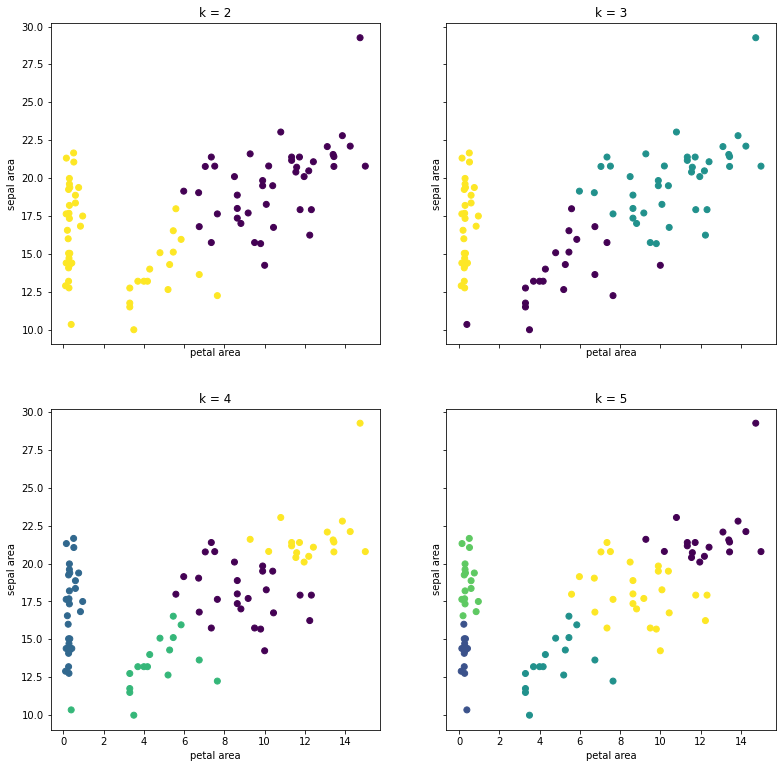

In [90]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_train).predict(X_train)
    ax.scatter(X_train.petal_area, X_train.sepal_area, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='petal area', ylabel='sepal area');

In [91]:
x=X_train.petal_area
y=X_train.sepal_area
z=X_train.clusters2

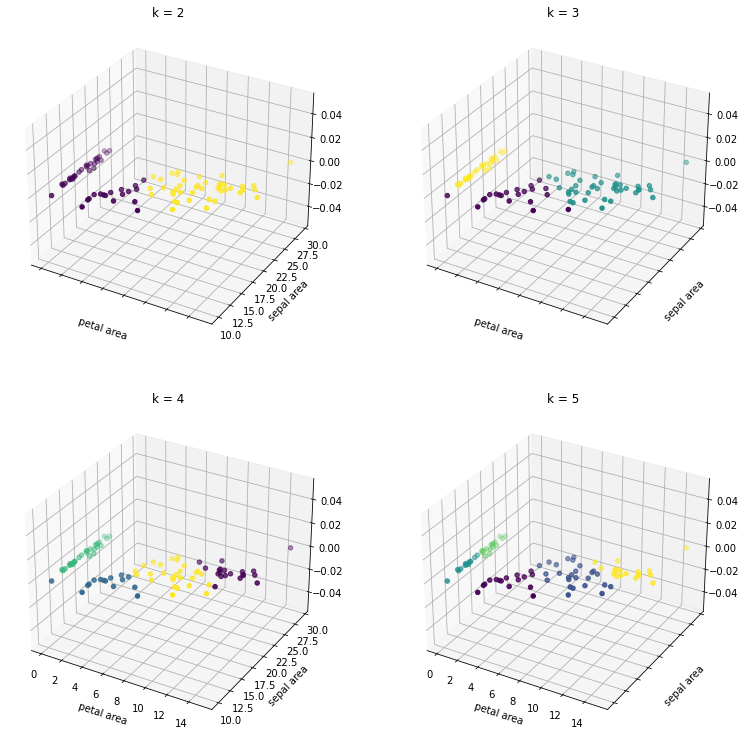

In [92]:
fig, axs = plt.subplots(
    
    2, 2,
    figsize=(13, 13),
    subplot_kw=dict(projection='3d'),
    sharex=True, sharey=True
)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X_train).predict(X_train)
    ax.scatter(x, y, c=clusters)
    ax.set(title='k = {}'.format(k),
           xlabel='petal area',
           ylabel='sepal area')

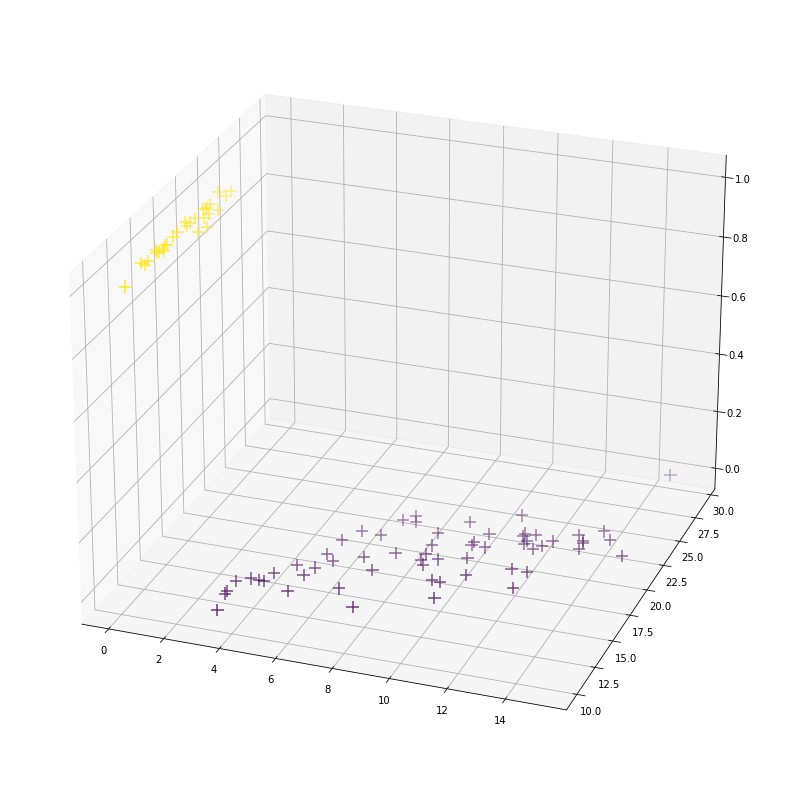

In [93]:
fig = plt.figure(figsize=(14, 20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c=z, marker='+', s=150)
ax.view_init(25, 290)
plt.show()

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset.
Be sure to visualize your results!

In [94]:
df = get_mall_customer_data()

In [95]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [96]:
df['is_male'] = (df.gender == 'Male').astype('int')

In [97]:
df = df.drop(columns=['gender', 'customer_id'])

In [98]:
train_validate, test = train_test_split(df, test_size=.2)
train, validate = train_test_split(train_validate, test_size=.25)

In [99]:
train.head()

,age,annual_income,spending_score,is_male
122,40,69,58,0
132,25,72,34,0
81,38,54,55,1
177,27,88,69,1
171,28,87,75,1


In [100]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(train)

KMeans(n_clusters=4)

In [101]:
train['clusters'] = kmeans.labels_

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


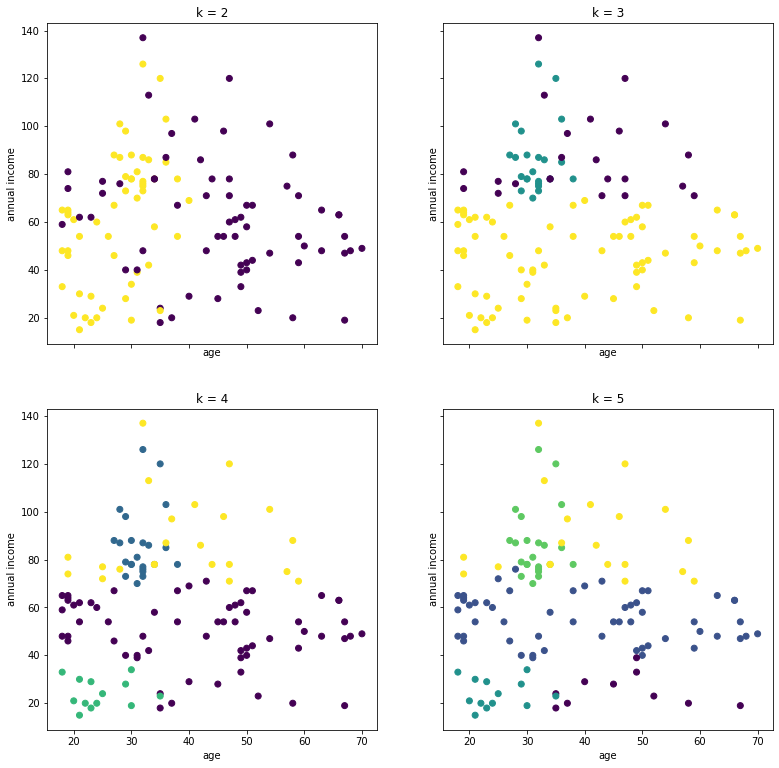

In [102]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(train.drop(columns='clusters')).predict(train.drop(columns='clusters'))
    ax.scatter(train.age, train.annual_income, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='annual income');

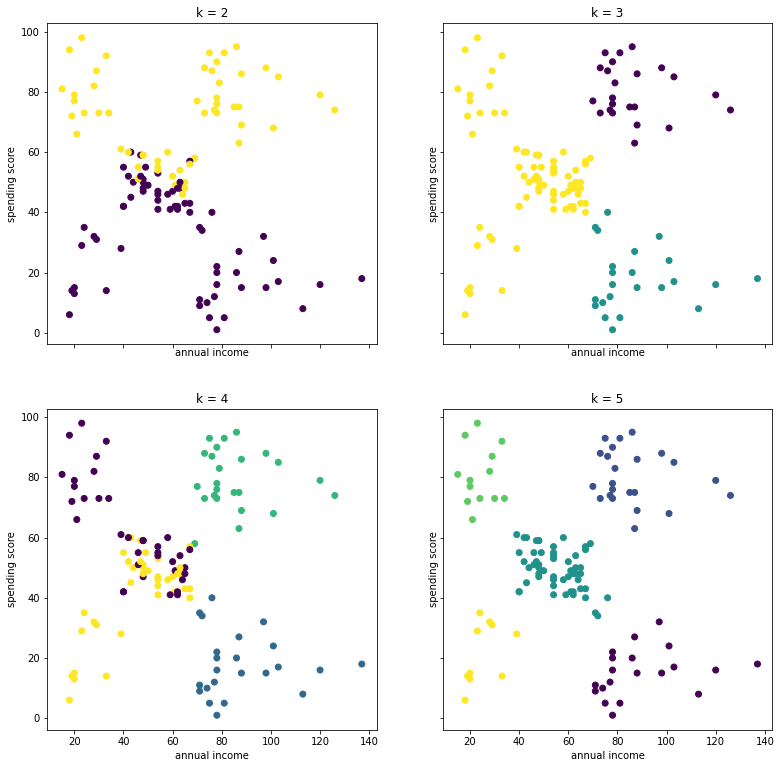

In [103]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(train.drop(columns='clusters')).predict(train.drop(columns='clusters'))
    ax.scatter(train.annual_income, train.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual income', ylabel='spending score');

# Scaled Data

In [104]:
columns_to_scale = ['age', 'annual_income', 'spending_score', 'is_male']
scaled_columns = [column + '_scaled' for column in columns_to_scale]

In [105]:
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train[columns_to_scale]),
                     index=train.index,
                     columns=scaled_columns)

In [106]:
train_scaled.head()

,age_scaled,annual_income_scaled,spending_score_scaled,is_male_scaled
122,0.177601,0.307716,0.298834,-0.830747
132,-0.902405,0.424079,-0.676950,-0.830747
81,0.033600,-0.274100,0.176861,1.203736
177,-0.758405,1.044682,0.746068,1.203736
171,-0.686404,1.005894,0.990014,1.203736


In [107]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(train_scaled)

KMeans(n_clusters=4)

In [108]:
train_scaled.head()

,age_scaled,annual_income_scaled,spending_score_scaled,is_male_scaled
122,0.177601,0.307716,0.298834,-0.830747
132,-0.902405,0.424079,-0.676950,-0.830747
81,0.033600,-0.274100,0.176861,1.203736
177,-0.758405,1.044682,0.746068,1.203736
171,-0.686404,1.005894,0.990014,1.203736


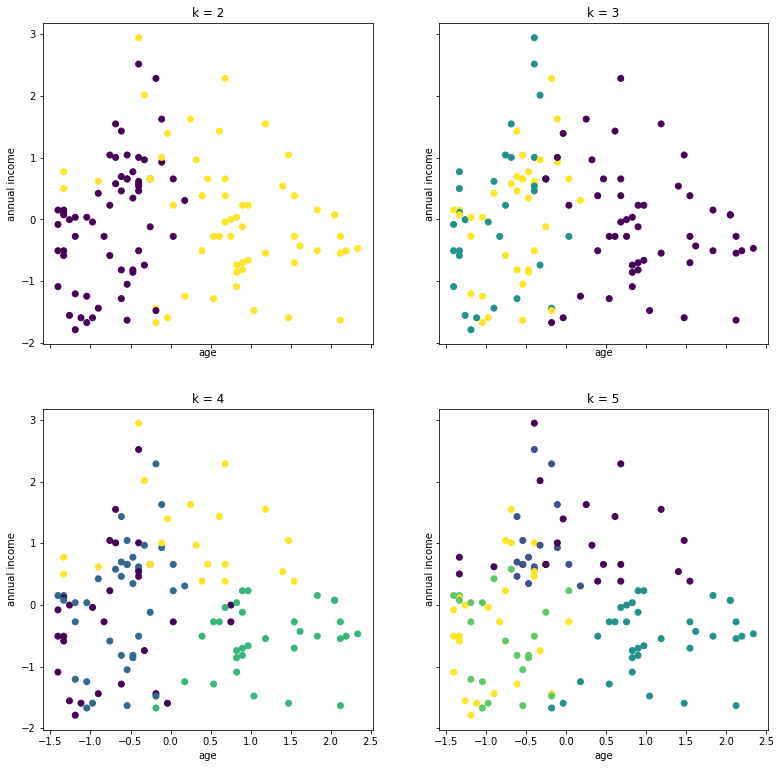

In [109]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(train_scaled).predict(train_scaled)
    ax.scatter(train_scaled.age_scaled, train_scaled.annual_income_scaled, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='annual income');

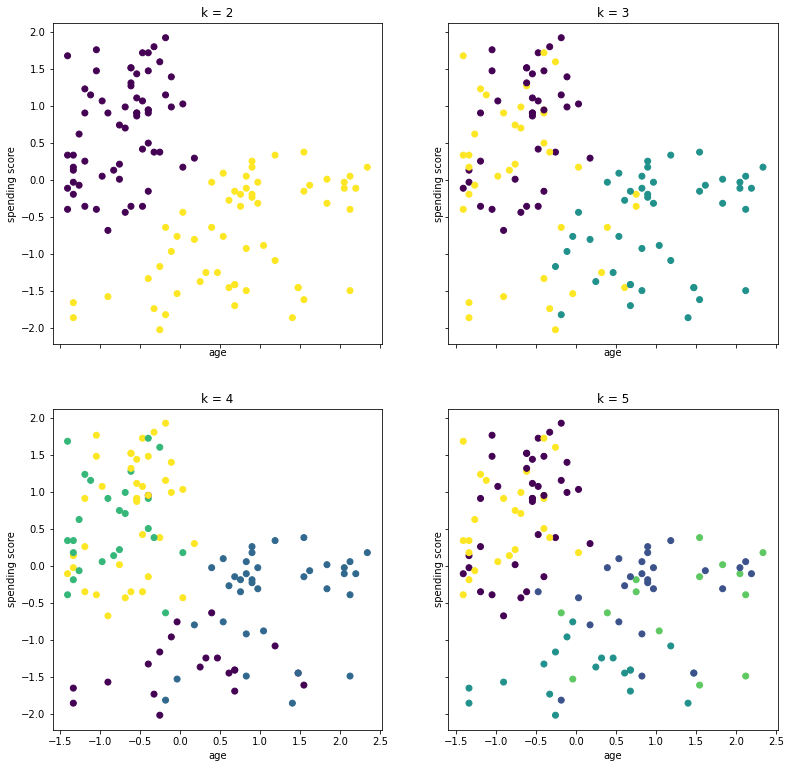

In [110]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(train_scaled).predict(train_scaled)
    ax.scatter(train_scaled.age_scaled, train_scaled.spending_score_scaled, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='spending score');

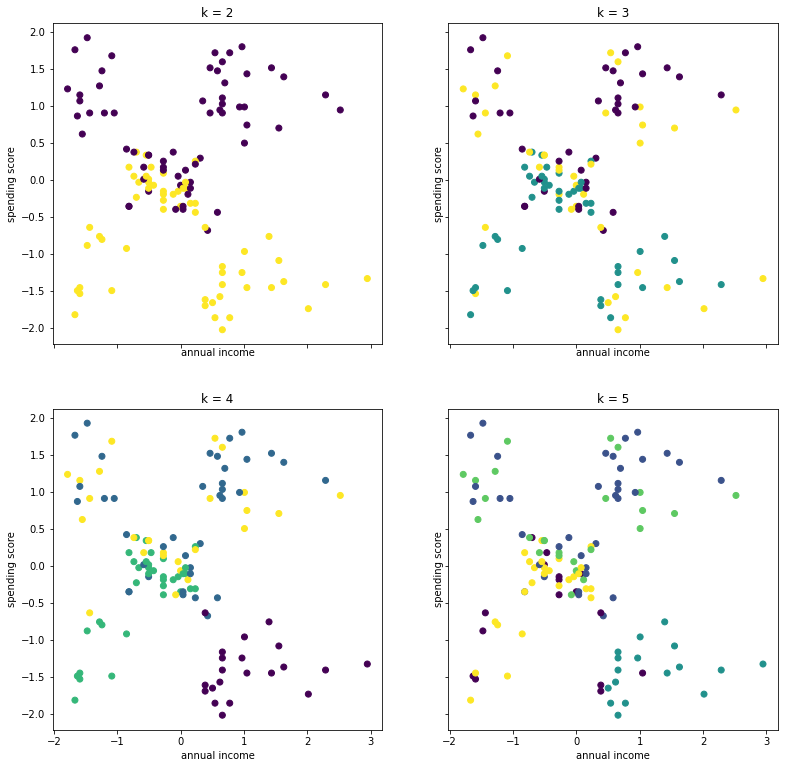

In [111]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(train_scaled).predict(train_scaled)
    ax.scatter(train_scaled.annual_income_scaled, train_scaled.spending_score_scaled, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual income', ylabel='spending score');

## 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.